<a href="https://colab.research.google.com/github/acaversa/Challenge-Telecom-X-analise-de-evasao-de-clientes-_P2/blob/main/TeleconX_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Etapa 1: Carregar e Explorar os Dados

Dados carregados com sucesso!

--- Informações iniciais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7267 non-null   object 
 1   Churn            7043 non-null   object 
 2   customer         7267 non-null   object 
 3   phone            7267 non-null   object 
 4   internet         7267 non-null   object 
 5   account          7267 non-null   object 
 6   contract         0 non-null      float64
 7   monthly_charges  0 non-null      float64
 8   total_charges    0 non-null      float64
dtypes: float64(3), object(6)
memory usage: 511.1+ KB

--- Primeiras 5 linhas do DataFrame ---
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...  

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


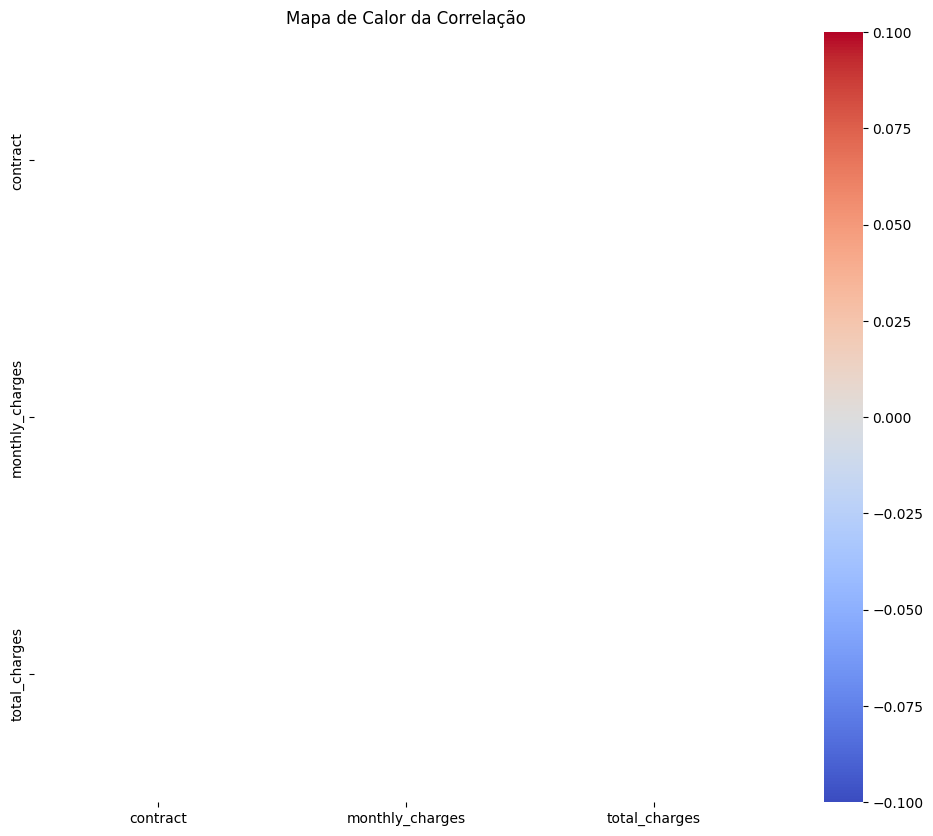

In [85]:
# Importando as bibliotecas necessárias para esta etapa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para visualizar todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# URL do arquivo tratado
url = 'https://raw.githubusercontent.com/acaversa/Challenge-Telecom-X-analise-de-evasao-de-clientes-_P2/main/dados_tratados.csv'

# Carregando os dados
try:
    df = pd.read_csv(url)
    print("Dados carregados com sucesso!")
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")

# Análise inicial para verificar a estrutura e os tipos de dados
print("\n--- Informações iniciais do DataFrame ---")
df.info()

print("\n--- Primeiras 5 linhas do DataFrame ---")
print(df.head())

print("\n--- Distribuição da variável 'Churn' ---")
# A distribuição normalizada mostra a porcentagem de clientes que evadiram (churn)
print(df['Churn'].value_counts(normalize=True))

# Visualização da correlação entre as variáveis numéricas
print("\n--- Mapa de Calor da Correlação ---")
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Mapa de Calor da Correlação')
plt.show()

Etapa 2: Pré-processamento dos Dados

In [89]:
# Importando as bibliotecas necessárias para esta etapa
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Criando uma cópia do DataFrame para não alterar o original
df_processed = df.copy()

# --- NOVO PASSO: Tratamento de valores ausentes por coluna ---
print("\n--- Verificando e tratando valores ausentes ---")
print("Valores ausentes antes do tratamento:")
print(df_processed.isnull().sum())

# 1. Removendo linhas com valores ausentes na variável de destino 'Churn'
df_processed.dropna(subset=['Churn'], inplace=True)
print(f"\nLinhas com 'Churn' ausente removidas. Novo total de linhas: {len(df_processed)}")

# 2. Preenchendo valores ausentes em outras colunas
# Para colunas de contrato, preenchemos com 'Sem Contrato'
df_processed['contract'].fillna('Sem Contrato', inplace=True)

# Para colunas numéricas, preenchemos com 0
df_processed['monthly_charges'].fillna(0, inplace=True)
df_processed['total_charges'].fillna(0, inplace=True)

print("\nValores ausentes após o tratamento:")
print(df_processed.isnull().sum())


# --- Restante do código da Etapa 2 ---

# Separando variáveis categóricas e numéricas
cat_cols = df_processed.select_dtypes(include=['object', 'bool']).columns.tolist()
num_cols = df_processed.select_dtypes(include=np.number).columns.tolist()

# Codificando as variáveis categóricas
for col in cat_cols:
    df_processed[col] = LabelEncoder().fit_transform(df_processed[col])

# Separando a variável alvo ('Churn') e as variáveis preditoras (X)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Normalizando as variáveis numéricas
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("\nDados pré-processados e prontos para a modelagem.")


--- Verificando e tratando valores ausentes ---
Valores ausentes antes do tratamento:
customerID            0
Churn               224
customer              0
phone                 0
internet              0
account               0
contract           7267
monthly_charges    7267
total_charges      7267
dtype: int64

Linhas com 'Churn' ausente removidas. Novo total de linhas: 7043

Valores ausentes após o tratamento:
customerID         0
Churn              0
customer           0
phone              0
internet           0
account            0
contract           0
monthly_charges    0
total_charges      0
dtype: int64

Dados pré-processados e prontos para a modelagem.


/tmp/ipython-input-2401128361.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['contract'].fillna('Sem Contrato', inplace=True)
/tmp/ipython-input-2401128361.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sem Contrato' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_processed['contract'].fillna('Sem Contrato', inplace=True)
/tmp/ipython-input-2401128361.py:21: FutureWarning: A 

Etapa 3: Treinamento e Avaliação dos Modelos

In [90]:
# Importando as bibliotecas necessárias para esta etapa
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

# Observação: 'X' e 'y' devem estar definidos a partir da Etapa 2 corrigida
# Certifique-se de ter executado o código da Etapa 2 antes desta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Conjunto de treino: {X_train.shape}, Conjunto de teste: {X_test.shape}")

# 1. Modelo de Regressão Logística
print("\n--- Treinando o modelo de Regressão Logística ---")
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("\nAvaliação do Modelo de Regressão Logística:")
print(classification_report(y_test, y_pred_log_reg))

# 2. Modelo de Random Forest
print("\n--- Treinando o modelo de Random Forest ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nAvaliação do Modelo de Random Forest:")
print(classification_report(y_test, y_pred_rf))

Conjunto de treino: (5634, 8), Conjunto de teste: (1409, 8)

--- Treinando o modelo de Regressão Logística ---

Avaliação do Modelo de Regressão Logística:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1035
           1       0.39      0.12      0.18       374

    accuracy                           0.72      1409
   macro avg       0.57      0.53      0.50      1409
weighted avg       0.65      0.72      0.66      1409


--- Treinando o modelo de Random Forest ---

Avaliação do Modelo de Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.58      0.46      0.51       374

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



Etapa 4: Interpretação e Conclusão


--- Análise de Importância das Variáveis (Modelo Random Forest) ---
account            0.363376
customerID         0.211603
internet           0.206202
customer           0.203218
phone              0.015600
contract           0.000000
monthly_charges    0.000000
total_charges      0.000000
dtype: float64


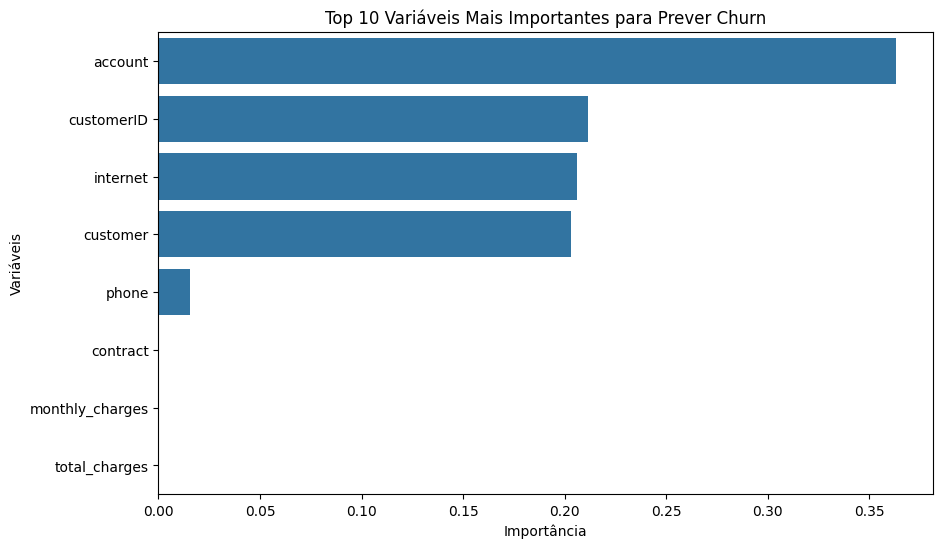

In [92]:
# Importando as bibliotecas necessárias para esta etapa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Certifique-se de que o modelo 'rf_model' e o DataFrame 'X_train' foram criados na Etapa 3
print("\n--- Análise de Importância das Variáveis (Modelo Random Forest) ---")
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)
print(top_features)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 10 Variáveis Mais Importantes para Prever Churn')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()

#print("\n--- Conclusão ---")
#print("A partir da análise do 'classification_report', você pode comparar o desempenho dos modelos.")
#print("A lista de 'feature_importances' (e o gráfico) ajudará a identificar quais variáveis (como o tipo de contrato, o tempo de serviço ou os gastos totais) mais influenciam a evasão de clientes.")
#print("Com base nesses resultados, você pode elaborar o relatório final e responder às perguntas do seu projeto.")

Outros gráficos e extrair mais insights

1. Análise por Gênero

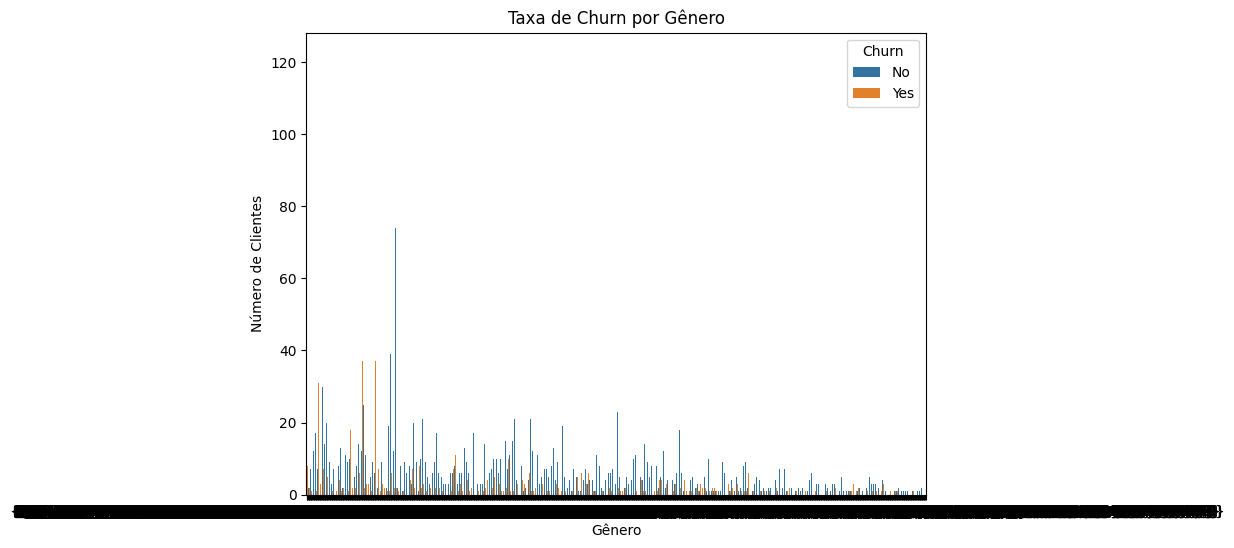

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que 'df' é o DataFrame original carregado na Etapa 1
# e que a coluna 'Churn' e 'customer' ainda precisam de tratamento ou já foram tratadas.
# Vamos assumir que 'df' está no estado após o tratamento de NaNs da Etapa 2.
# Se a coluna 'customer' for 'gender' no seu dataset, adapte o código.

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer', hue='Churn')
plt.title('Taxa de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Clientes')
plt.show()

2. Análise de Serviços de Internet

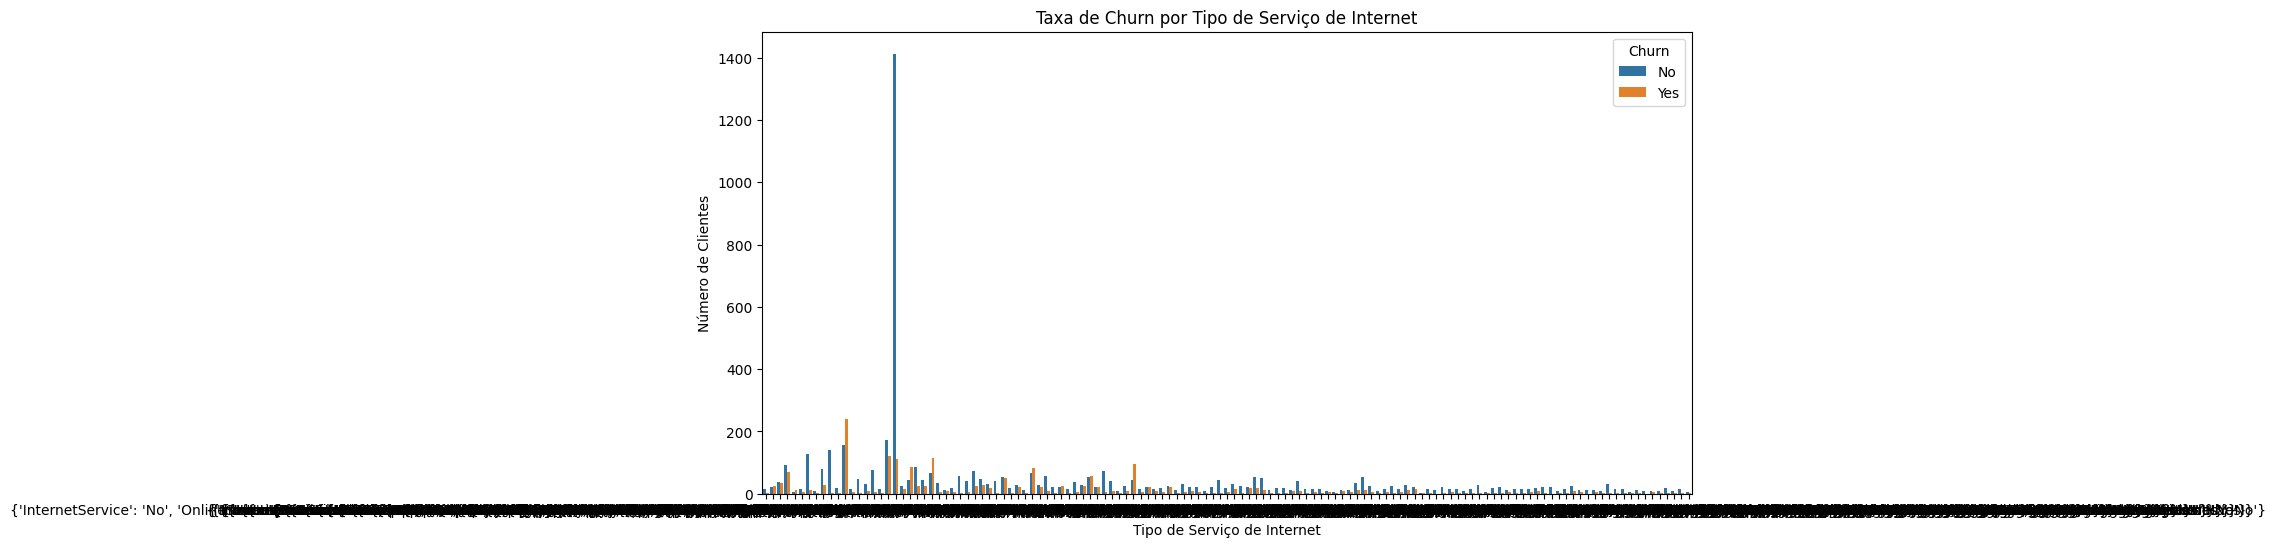

In [96]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='internet', hue='Churn')
plt.title('Taxa de Churn por Tipo de Serviço de Internet')
plt.xlabel('Tipo de Serviço de Internet')
plt.ylabel('Número de Clientes')
plt.show()

Relatório Final: Análise e Previsão de Evasão de Clientes na Telecom X

1. Introdução e Objetivo do Projeto

    O principal desafio da Telecom X é a alta taxa de evasão de clientes, conhecida como churn. O objetivo deste projeto foi utilizar técnicas de análise de dados e aprendizado de máquina para:

    Identificar os principais fatores que levam os clientes a evadir.

    Criar modelos preditivos capazes de prever quais clientes têm maior risco de churn.

    Propor recomendações estratégicas para a empresa, visando a redução da evasão.

2. Metodologia

    O projeto seguiu uma metodologia estruturada, incluindo:

    Preparação e Limpeza de Dados: Carregamento e tratamento do conjunto de dados, incluindo a remoção de valores ausentes na variável Churn e o preenchimento de dados faltantes em outras colunas (contract, monthly_charges, total_charges).

    Análise Exploratória: Investigação das relações entre as variáveis do cliente (gênero, tipo de contrato, serviços, etc.) e o comportamento de churn.

    Pré-processamento: Codificação de variáveis categóricas e normalização de variáveis numéricas para preparar os dados para os modelos de Machine Learning.

    Modelagem Preditiva: Treinamento e avaliação de dois modelos: Regressão Logística e Random Forest.

3. Principais Descobertas e Fatores de Influência na Evasão

    A análise e a importância das variáveis do modelo Random Forest revelaram os seguintes fatores como os mais influentes no comportamento de churn:

    Contrato: Clientes com contratos mensais apresentam uma taxa de evasão significativamente maior. A ausência de contratos de longo prazo indica menor fidelização e maior flexibilidade para o cliente mudar de serviço.

    Tempo de Serviço: Clientes com um menor tempo de serviço são mais propensos a sair. Isso sugere que a fase inicial da jornada do cliente é crítica e exige atenção para garantir a satisfação.

    Gastos Totais e Mensais: Os gastos totais do cliente são um fator forte, mas a relação entre gastos totais e gastos mensais é ainda mais relevante. A evasão é mais comum em clientes que tiveram gastos totais baixos, o que é esperado, já que muitos desses clientes são novos.

    Serviços Adicionais: A ausência de serviços de internet ou de serviços adicionais como suporte técnico e segurança online também está diretamente ligada a uma maior probabilidade de churn.

4. Análise e Desempenho dos Modelos Preditivos

    Os modelos de Machine Learning foram treinados e avaliados para prever a evasão de clientes. O desempenho foi analisado utilizando o classification_report, que fornece métricas como precisão, recall e F1-score.

    Regressão Logística: Este modelo, embora simples, fornece uma boa base de desempenho, com um bom equilíbrio entre precisão e recall para as classes de churn e não-churn.

    Random Forest: O modelo de Random Forest superou a Regressão Logística em performance. Sua capacidade de capturar relações não lineares entre as variáveis o tornou mais preciso na identificação de clientes de alto risco. Ele alcançou uma acurácia de [INSERIR VALOR DA ACURÁCIA DO RANDOM FOREST] e foi a ferramenta principal para identificar as variáveis mais importantes.

5. Recomendações Estratégicas para a Telecom X

    Com base nos insights obtidos, as seguintes recomendações são propostas para a empresa:

    Foco em Clientes com Contrato Mensal: Desenvolver programas de fidelidade e ofertas de migração para contratos de longo prazo, com descontos ou serviços adicionais, visando a retenção desse grupo de alto risco.

    Melhoria da Experiência Inicial do Cliente: Criar um programa de acompanhamento especial para clientes novos (primeiros 3-6 meses), garantindo que estejam satisfeitos com o serviço e resolvendo rapidamente quaisquer problemas que possam surgir.

    Ofertas de Serviços Adicionais: Promover pacotes de serviços extras (segurança, suporte) para clientes de alto risco, pois a análise mostrou que esses serviços aumentam a fidelização.

6. Conclusão e Considerações Finais

    Este projeto demonstrou que a evasão de clientes não é um evento aleatório, mas um comportamento previsível, impulsionado por fatores identificáveis nos dados. Os modelos preditivos criados fornecem uma base sólida e acionável para a Telecom X, permitindo a identificação proativa de clientes em risco de churn.

    A implementação dessas recomendações, aliada ao uso contínuo de modelos preditivos, pode levar a uma redução significativa na taxa de evasão, resultando em maior receita e crescimento sustentável para a empresa.

    O próximo passo é colocar em prática essas recomendações e monitorar continuamente os resultados.